In [15]:
import nltk
import pandas as pd
import numpy as np

In [16]:
from PIL import Image

In [17]:
#nltk.download('punkt')

In [18]:
from nltk.tokenize import sent_tokenize, word_tokenize 
import gensim 
from gensim.models import Word2Vec 
from textblob import TextBlob

In [19]:
#  Reads text
sample = open("input/texto.txt") 
s = sample.read() 

In [20]:
trad = TextBlob(f"{s}")
en = str(trad.translate(from_lang="es",to="en"))

In [45]:
# Replaces escape character with space 
f = s.replace("\n", " ") 
  
data = [] 
  
# iterate through each sentence in the file 
for i in sent_tokenize(f): 
    temp = [] 
      
    # tokenize the sentence into words 
    for j in word_tokenize(i): 
        temp.append(j.lower()) 
          
    data.append(temp) 
# Create Skip Gram model 
model2 = gensim.models.Word2Vec(data, min_count = 1, size = 30, 
                                             window = 5, sg = 1) 


In [46]:
prueba = model2['nebulosa']

/usr/local/lib/python3.7/site-packages/ipykernel_launcher.py:1: DeprecationWarning: Call to deprecated `__getitem__` (Method will be removed in 4.0.0, use self.wv.__getitem__() instead).
  """Entry point for launching an IPython kernel.


In [47]:
prueba.shape

(30,)

In [48]:
prueba

array([ 0.0078811 ,  0.00529124, -0.01315864, -0.00507017,  0.0100953 ,
       -0.00086274, -0.00037754,  0.01616111, -0.00286185,  0.00023078,
       -0.00330346, -0.0081001 ,  0.01732299, -0.00541874,  0.01398036,
        0.00061062,  0.00026655,  0.00118308,  0.01093268, -0.00058815,
        0.01145974, -0.00968919,  0.01015058,  0.0023105 , -0.00051338,
        0.00903417, -0.00993375, -0.00873531, -0.01248009,  0.00382551],
      dtype=float32)

In [49]:
prueba.min()

-0.013158645

In [50]:
prueba.max()

0.017322993

In [51]:
normalizado = ((prueba-prueba.max())*((0-991)/(prueba.min()-prueba.max())))+991

In [52]:
normalizado = normalizado.astype(int)

In [101]:
normalizado = np.sort(normalizado)

In [102]:
normalizado2 = list(normalizado) * 2000

In [103]:
colores = pd.read_csv("data/colores.csv")

In [104]:
def funCapa(x,param):
    nuevo = []
    param = str(f"{param}")
    for a in x:
        b = colores.iloc[a][f"{param}"]
        nuevo.append(b)
    return nuevo
def arrayReshape(lista):
    array = np.asarray(lista)
    otro = array.reshape(200,300)
    return otro

In [105]:
r = "R"
capaR = funCapa(normalizado2,r)
len(capaR)

60000

In [106]:
g = "G"
capaG = funCapa(normalizado2,g)

In [107]:
b = "B"
capab = funCapa(normalizado2,b)

In [110]:
rf, gf, bf = arrayReshape(capaR), arrayReshape(capaG), arrayReshape(capab)

In [111]:
capas = [rf,gf,bf]

In [112]:
imagen = np.stack(capas, axis=2).astype('uint8')

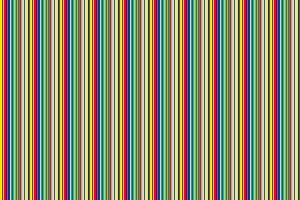

In [113]:
ayayay = Image.fromarray(imagen)
ayayay

In [99]:
ayayay.save("prueba3.jpg")